# **Research Domains for Non-English Articles across multiple Institutions**
## Exploring Publications in *OpenAlex*


## What is analyzed
- The number of non-English research articles published by each Swiss university, grouped by broad research domains (Life Sciences, Health Sciences, Physical Sciences, Social Sciences).
- The proportion of non-English articles in each domain for every institution in 2024.
- Overall the most frequent research domain for non-English articles.

## Why is this analysis interesting
- Switzerland is a multilingual country, and understanding the subject areas where non-English research is published can reveal how language and discipline interact in academic publishing.
- Different universities may have strengths in different domains.

## What can be observed?
- The relative distribution of non-English articles across research domains varies between institutions.
- Overall, can observe a clear dominance of non-English articles in the social science domain.
- University of Lausanne and Geneva have higher counts than e.g. EPFL or ETH Zürich.
- The visualization provides an overview of total percentages per institution.

### Setup
#### Imports

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from swiss_universities import swiss_unis

#### Response Validation

In [2]:
def validate_response(response):
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Error: {response.status_code} - {response.text}")
        return {"group_by": [], "results": []}

## Analysis 1: Research Domains of Non-English Articles of an Institution

### Step 1: Fetch Domain Counts
Fetch **non-English** domain counts for a given institution and publication year:

In [3]:
def fetch_non_english_domain_counts(institution_id, publication_year=2024):
    # Loop through all domains
    domain_ids = {
        "Life Sciences": "domains/1",
        "Social Sciences": "domains/2",
        "Physical Sciences": "domains/3",
        "Health Sciences": "domains/4"
    }
    
    domain_counts = {}
    
    # Filter for institution, non-english and publication year
    for domain_name, domain_id in domain_ids.items():
        url = (
            f"https://api.openalex.org/works?filter="
            f"authorships.institutions.lineage:{institution_id},"
            f"primary_topic.domain.id:{domain_id},"
            f"language:!languages/en,"
            f"publication_year:{publication_year}&per-page=1"
        )
        response = requests.get(url)
        data = validate_response(response)
        # get counts
        domain_counts[domain_name] = data.get("meta", {}).get("count", 0)
        
    return domain_counts

Fetch **English** domain counts for a given institution and publication year:

In [4]:
def fetch_english_domain_counts(institution_id, publication_year=2024):
    # Loop through all domains
    domain_ids = {
        "Life Sciences": "domains/1",
        "Social Sciences": "domains/2",
        "Physical Sciences": "domains/3",
        "Health Sciences": "domains/4"
    }
    
    domain_counts = {}
    
    # Filter for institution, non-english and publication year
    for domain_name, domain_id in domain_ids.items():
        url = (
            f"https://api.openalex.org/works?page=1&filter="
            f"authorships.institutions.lineage:{institution_id},"
            f"publication_year:{publication_year},"
            f"language:languages/en,"
            f"primary_topic.domain.id:{domain_id}&"
            f"sort=cited_by_count:desc&per_page=1"
        )
        response = requests.get(url)
        data = validate_response(response)
        # get counts
        domain_counts[domain_name] = data.get("meta", {}).get("count", 0)
        
    return domain_counts

**Select one Institution based on Institution Index from swiss_universitites.py**

In [5]:
# Select one institution (you can change to any key in swiss_unis)
selected_inst = list(swiss_unis.keys())[1]  # e.g., 'University of Zurich'
selected_id = swiss_unis[selected_inst]

# Fetch counts for the selected institution
domain_counts = fetch_non_english_domain_counts(selected_id)
english_domain_counts = fetch_english_domain_counts(selected_id)

### Step 2: Create and Display DataFrames

In [6]:
# Create DataFrames for the single institution
domain_data = pd.DataFrame([domain_counts], index=[selected_inst])
english_df = pd.DataFrame([english_domain_counts], index=[selected_inst])

# Add totals and top domain
domain_data["Total Non-English Domain Articles"] = domain_data.sum(axis=1, numeric_only=True)
english_df["Total English Domain Articles"] = english_df.sum(axis=1, numeric_only=True)
domain_data["Top Domain"] = domain_data.drop(columns="Total Non-English Domain Articles").idxmax(axis=1)

In [7]:
english_df

,Life Sciences,Social Sciences,Physical Sciences,Health Sciences,Total English Domain Articles
University of Zurich,1771,1393,1672,3076,7912


In [8]:
domain_data

,Life Sciences,Social Sciences,Physical Sciences,Health Sciences,Total Non-English Domain Articles,Top Domain
University of Zurich,18,119,71,77,285,Social Sciences


### Step 3: Calculate Percentages

In [9]:
# For the single institution, calculate the percentage of non-English articles
total_articles_single = domain_data["Total Non-English Domain Articles"].iloc[0] + english_df["Total English Domain Articles"].iloc[0]
non_english_pct_single = (domain_data["Total Non-English Domain Articles"].iloc[0] / total_articles_single) * 100
english_pct_single = (english_df["Total English Domain Articles"].iloc[0] / total_articles_single) * 100

print(f"Total number of articles for {selected_inst} in 2024: {total_articles_single}")
print(f"Percentage of Non-English articles: {non_english_pct_single:.2f}%")
print(f"Percentage of English articles: {english_pct_single:.2f}%")

Total number of articles for University of Zurich in 2024: 8197
Percentage of Non-English articles: 3.48%
Percentage of English articles: 96.52%


## Analysis 2: Research Domains of Non-English Articles across Swiss Universities

### Step 1: Fetch Domain Counts
> Here we reuse the functions from above

### Step 2: Loop over all universities and fetch counts
> `swiss_unis` is a dictionary imported from swiss_universities.py

**Non-English Domain Data**

In [10]:
domain_data = {}

for name, inst_id in swiss_unis.items():
    # Fetch counts for each institution
    domain_counts = fetch_non_english_domain_counts(inst_id) 
    # Store fetched counts in the dictionary
    domain_data[name] = domain_counts 

**English Domain Data**

In [11]:
english_domain_data = {}

for name, inst_id in swiss_unis.items():
    # Fetch counts for each institution
    english_domain_counts = fetch_english_domain_counts(inst_id) 
    # Store fetched counts in the dictionary
    english_domain_data[name] = english_domain_counts

### Step 3: Display Data Frames

**English Domain Data**

In [12]:
# Convert english_domain_data to DataFrame and compute total English articles
english_df = pd.DataFrame(english_domain_data).T

# Add the total English articles column to domain_data
english_df["Total English Domain Articles"] = english_df.sum(axis=1)
english_df

,Life Sciences,Social Sciences,Physical Sciences,Health Sciences,Total English Domain Articles
ETH Zurich,1387,726,5810,1003,8926
University of Zurich,1771,1393,1672,3076,7912
EPFL,766,244,3399,469,4878
University of Bern,1128,748,1660,3026,6562
University of Basel,903,556,858,1749,4066
University of St. Gallen,33,389,129,147,698
University of Lucerne,50,123,18,386,577
University of Fribourg,296,260,426,245,1227
University of Lausanne,1023,845,891,2164,4923
University of Geneva,784,660,1356,1273,4073


**Non-English Domain Data**

In [13]:
# transpose to have institutions as rows
domain_data = pd.DataFrame(domain_data).T 
# sum across all domains
domain_data["Total Non-English Domain Articles"] = domain_data.sum(axis=1)

# sort by total
domain_data["Top Domain"] = domain_data.drop(columns="Total Non-English Domain Articles").idxmax(axis=1)

domain_data


,Life Sciences,Social Sciences,Physical Sciences,Health Sciences,Total Non-English Domain Articles,Top Domain
ETH Zurich,8,19,68,9,104,Physical Sciences
University of Zurich,18,119,71,77,285,Social Sciences
EPFL,5,14,57,6,82,Physical Sciences
University of Bern,19,85,22,67,193,Social Sciences
University of Basel,2,56,16,32,106,Social Sciences
University of St. Gallen,0,40,7,9,56,Social Sciences
University of Lucerne,0,28,0,6,34,Social Sciences
University of Fribourg,5,99,15,26,145,Social Sciences
University of Lausanne,12,215,17,95,339,Social Sciences
University of Geneva,12,153,64,79,308,Social Sciences


### Step 3: Visualization 

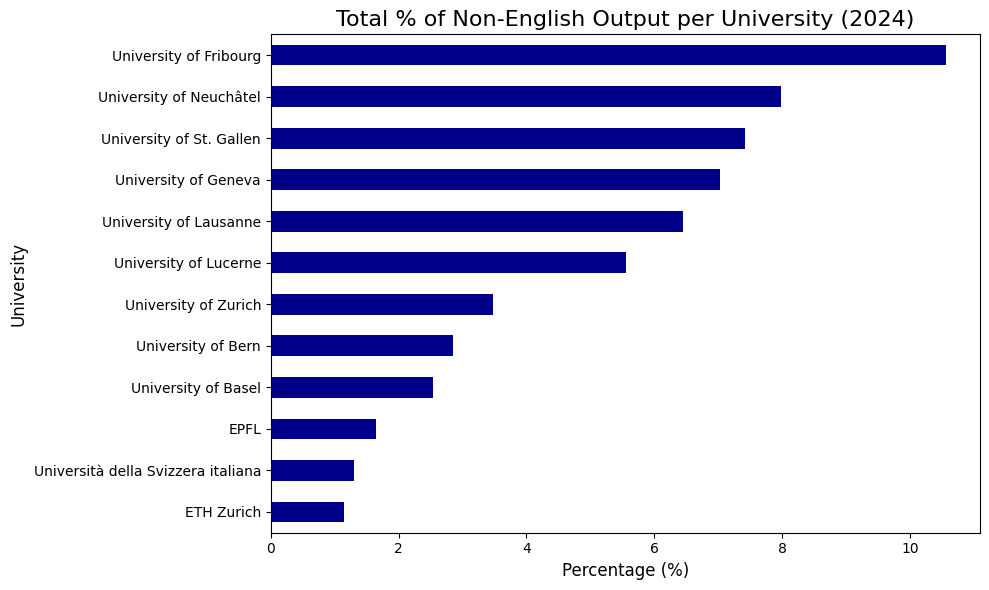

In [14]:
# Calculate total articles per university (English + Non-English)
total_articles = domain_data["Total Non-English Domain Articles"] + english_df["Total English Domain Articles"]

# Calculate percentage of non-English articles
non_english_percentage = (domain_data["Total Non-English Domain Articles"] / total_articles) * 100

# Visualization: Bar chart for total % of non-English output per university
fig, ax = plt.subplots(figsize=(10, 6))
non_english_percentage.sort_values().plot(kind='barh', ax=ax, color='darkblue')
ax.set_title("Total % of Non-English Output per University (2024)", fontsize=16)
ax.set_xlabel("Percentage (%)", fontsize=12)
ax.set_ylabel("University", fontsize=12)
plt.tight_layout()
plt.show()

### (Optional) Step 4: Answer Questions

#### Most frequent Research Domain for Non-English Articles across Swiss Universities

In [15]:
total_by_domain = domain_data.drop(columns=["Total Non-English Domain Articles", "Top Domain"]).sum()
most_freq_domain = total_by_domain.idxmax()
print("Most frequent domain:", most_freq_domain)

Most frequent domain: Social Sciences



#### Average number of non-English articles per university

In [16]:
avg_non_english = domain_data["Total Non-English Domain Articles"].mean()
print(f"Average non-English articles per university: {avg_non_english:.2f}")

Average non-English articles per university: 143.00
